In [1]:
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import dapper as dpr
import dapper.da_methods as da

In [3]:
dpr.set_seed(1234)

1234

# Hidden Markov Model

# Lorenz63

The constants in the model are:

`sig = 10.0`

`rho = 28.0`

`beta = 8.0/3`

https://nansencenter.github.io/DAPPER/dapper/mods/Lorenz63/index.html#gsc.tab=0

In [4]:
# Load experiment setup: the hidden Markov model (HMM)
from dapper.mods.Lorenz63.sakov2012 import HMM

In [5]:
HMM.t.T = 100  # shorten experiment

Generate ground truth(`xx`) and observations(`yy`) with a Gaussian noise.

https://nansencenter.github.io/DAPPER/dapper/mods/index.html#dapper.mods.HiddenMarkovModel.simulate

In [6]:
xx, yy = HMM.simulate()

Truth & Obs: 100%|██████████| 10000/10000 [00:00<00:00, 11655.20it/s]


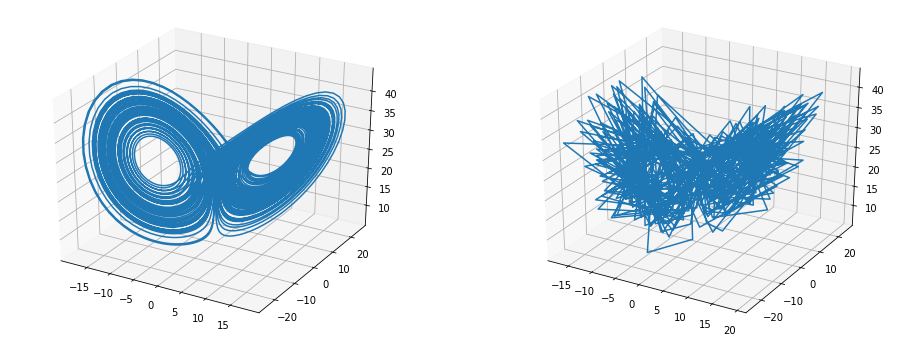

In [7]:
fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(xx[:, 0], xx[:, 1], xx[:, 2])

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(yy[:, 0], yy[:, 1], yy[:, 2])

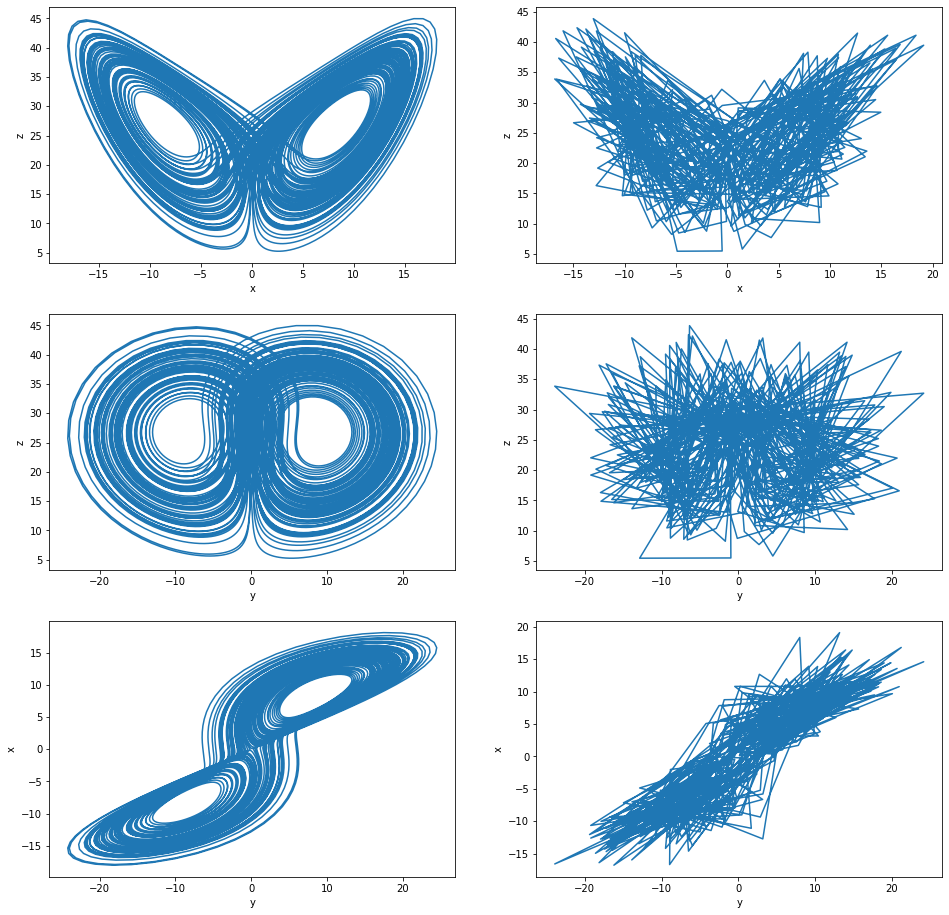

In [8]:
fig = plt.figure(figsize=(16, 16))

plt.subplot(3, 2, 1)
plt.plot(xx[:, 0], xx[:, 2])
plt.xlabel('x')
plt.ylabel('z')

plt.subplot(3, 2, 2)
plt.plot(yy[:, 0], yy[:, 2])
plt.xlabel('x')
plt.ylabel('z')

plt.subplot(3, 2, 3)
plt.plot(xx[:, 1], xx[:, 2])
plt.xlabel('y')
plt.ylabel('z')

plt.subplot(3, 2, 4)
plt.plot(yy[:, 1], yy[:, 2])
plt.xlabel('y')
plt.ylabel('z')

plt.subplot(3, 2, 5)
plt.plot(xx[:, 1], xx[:, 0])
plt.xlabel('y')
plt.ylabel('x')

plt.subplot(3, 2, 6)
plt.plot(yy[:, 1], yy[:, 0])
plt.xlabel('y')
plt.ylabel('x')

plt.show()

In [9]:
xps = dpr.xpList()

## Var3D

https://nansencenter.github.io/DAPPER/dapper/da_methods/baseline.html#gsc.tab=0

Default value is `xB = 1.0`

In [10]:
xps += da.Var3D(xB=0.1)
xps += da.Var3D(xB=1.0)
xps += da.Var3D(xB=10.0)

In [11]:
xps.launch(HMM, liveplots=False)

Experiment stored at /root/dpr_data/noname/run_2021-01-02__15:42:07


Var3D xB:10: 100%|██████████| 10000/10000 [00:01<00:00, 7152.24it/s]


PosixPath('/root/dpr_data/noname/run_2021-01-02__15:42:07')

In [12]:
print(xps.tabulate_avrgs())

     xB  |  rmse.a  1σ      rmv.a  1σ  rmse.f  1σ
-  ----  -  ------------  -----------  -----------
0   0.1  |    1    ±0.05  1.14671 ± 0     1.7 ±0.1
1   1    |    1.2  ±0.04  1.35754 ± 0     1.9 ±0.1
2  10    |    1.32 ±0.03  1.40808 ± 0     2   ±0.1


## Ensemble Kalman Filter

https://nansencenter.github.io/DAPPER/dapper/da_methods/ensemble.html

## Extended Kalman Filter

https://nansencenter.github.io/DAPPER/dapper/da_methods/extended.html#gsc.tab=0